In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import sklearn
import datetime
from matplotlib import *
import seaborn as sns
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from sklearn.metrics.pairwise import cosine_similarity
import statsmodels

In [2]:
df = pd.read_csv('C:\Estagio\projeto_final\TMDB_10000_Popular_Movies.csv')
df.head()

,TMDb_Id,IMDb_Id,Title,Original_Title,Overview,Genres,Cast,Crew,Collection,Release_Date,...,Languages_Spoken,Runtime,Tagline,Popularity,Rating_average,Rating_Count,Production_Companies,Country_of_Origin,Budget,Revenue
0,419704,tt2935510,Ad Astra,Ad Astra,"The near future, a time when both hope and har...",Drama | Science Fiction,Brad Pitt | Tommy Lee Jones | Ruth Negga | Joh...,Brad Pitt | Arnon Milchan | Gary Rydstrom | Ga...,Single,2019-09-17,...,English | Norsk,123.0,The answers we seek are just outside our reach,463.487,5.9,2863,New Regency Productions | Keep Your Head | Mad...,Brazil | China | United States of America,87500000.0,127175922.0
1,338762,tt1634106,Bloodshot,Bloodshot,"After he and his wife are murdered, marine Ray...",Action | Science Fiction,Vin Diesel | Eiza González | Sam Heughan | Tob...,John Papsidera | Matthew Vaughn | Jim May | Ne...,Single,2020-03-05,...,English,110.0,Being a superhero is in his blood,235.701,7.2,1384,Sony Pictures | Cross Creek Pictures | Mimran ...,China | United States of America,42000000.0,24573617.0
2,38700,tt1502397,Bad Boys for Life,Bad Boys for Life,Marcus and Mike are forced to confront new thr...,Action | Crime | Thriller,Will Smith | Martin Lawrence | Paola Nuñez | V...,Jerry Bruckheimer | Mike Stenson | Chad Oman |...,Bad Boys Collection,2020-01-15,...,Español | English,124.0,Ride together. Die together.,255.068,7.1,2596,Columbia Pictures | Platinum Dunes | 2.0 Enter...,France | United States of America,0.0,191150000.0
3,102899,tt0478970,Ant-Man,Ant-Man,Armed with the astonishing ability to shrink i...,Action | Adventure | Science Fiction,Paul Rudd | Michael Douglas | Evangeline Lilly...,David Lazan | Jackie Burch | Sala Baker | Sala...,Ant-Man Collection,2015-07-14,...,English,117.0,Heroes don't get any bigger.,134.294,7.1,13625,Marvel Studios,United States of America,130000000.0,519311965.0
4,76285,tt1854564,Percy Jackson: Sea of Monsters,Percy Jackson: Sea of Monsters,"In their quest to confront the ultimate evil, ...",Adventure | Fantasy | Family,Logan Lerman | Alexandra Daddario | Douglas Sm...,Mark Goldblatt | Shelly Johnson | Karen Rosenf...,Percy Jackson Collection,2013-08-07,...,English,106.0,"Where There Are Gods, There Are Monsters.",124.417,5.9,3547,Fox 2000 Pictures | Sunswept Entertainment | 1...,United States of America,90000000.0,199850315.0


In [3]:
df.shape

(10000, 22)

In [4]:
df.dtypes

TMDb_Id                   int64
IMDb_Id                  object
Title                    object
Original_Title           object
Overview                 object
Genres                   object
Cast                     object
Crew                     object
Collection               object
Release_Date             object
Release_Status           object
Original_Language        object
Languages_Spoken         object
Runtime                 float64
Tagline                  object
Popularity              float64
Rating_average          float64
Rating_Count              int64
Production_Companies     object
Country_of_Origin        object
Budget                  float64
Revenue                 float64
dtype: object

In [5]:
df['Release_Date']= pd.to_datetime(df['Release_Date'])

In [6]:
df.dtypes

TMDb_Id                          int64
IMDb_Id                         object
Title                           object
Original_Title                  object
Overview                        object
Genres                          object
Cast                            object
Crew                            object
Collection                      object
Release_Date            datetime64[ns]
Release_Status                  object
Original_Language               object
Languages_Spoken                object
Runtime                        float64
Tagline                         object
Popularity                     float64
Rating_average                 float64
Rating_Count                     int64
Production_Companies            object
Country_of_Origin               object
Budget                         float64
Revenue                        float64
dtype: object

In [7]:
df['Release_Date'] = df['Release_Date'].dt.year

In [8]:
df.head()

,TMDb_Id,IMDb_Id,Title,Original_Title,Overview,Genres,Cast,Crew,Collection,Release_Date,...,Languages_Spoken,Runtime,Tagline,Popularity,Rating_average,Rating_Count,Production_Companies,Country_of_Origin,Budget,Revenue
0,419704,tt2935510,Ad Astra,Ad Astra,"The near future, a time when both hope and har...",Drama | Science Fiction,Brad Pitt | Tommy Lee Jones | Ruth Negga | Joh...,Brad Pitt | Arnon Milchan | Gary Rydstrom | Ga...,Single,2019.0,...,English | Norsk,123.0,The answers we seek are just outside our reach,463.487,5.9,2863,New Regency Productions | Keep Your Head | Mad...,Brazil | China | United States of America,87500000.0,127175922.0
1,338762,tt1634106,Bloodshot,Bloodshot,"After he and his wife are murdered, marine Ray...",Action | Science Fiction,Vin Diesel | Eiza González | Sam Heughan | Tob...,John Papsidera | Matthew Vaughn | Jim May | Ne...,Single,2020.0,...,English,110.0,Being a superhero is in his blood,235.701,7.2,1384,Sony Pictures | Cross Creek Pictures | Mimran ...,China | United States of America,42000000.0,24573617.0
2,38700,tt1502397,Bad Boys for Life,Bad Boys for Life,Marcus and Mike are forced to confront new thr...,Action | Crime | Thriller,Will Smith | Martin Lawrence | Paola Nuñez | V...,Jerry Bruckheimer | Mike Stenson | Chad Oman |...,Bad Boys Collection,2020.0,...,Español | English,124.0,Ride together. Die together.,255.068,7.1,2596,Columbia Pictures | Platinum Dunes | 2.0 Enter...,France | United States of America,0.0,191150000.0
3,102899,tt0478970,Ant-Man,Ant-Man,Armed with the astonishing ability to shrink i...,Action | Adventure | Science Fiction,Paul Rudd | Michael Douglas | Evangeline Lilly...,David Lazan | Jackie Burch | Sala Baker | Sala...,Ant-Man Collection,2015.0,...,English,117.0,Heroes don't get any bigger.,134.294,7.1,13625,Marvel Studios,United States of America,130000000.0,519311965.0
4,76285,tt1854564,Percy Jackson: Sea of Monsters,Percy Jackson: Sea of Monsters,"In their quest to confront the ultimate evil, ...",Adventure | Fantasy | Family,Logan Lerman | Alexandra Daddario | Douglas Sm...,Mark Goldblatt | Shelly Johnson | Karen Rosenf...,Percy Jackson Collection,2013.0,...,English,106.0,"Where There Are Gods, There Are Monsters.",124.417,5.9,3547,Fox 2000 Pictures | Sunswept Entertainment | 1...,United States of America,90000000.0,199850315.0


In [9]:
df = df.dropna(subset=['Release_Date'])

In [10]:
df.shape

(9997, 22)

In [11]:
df['Release_Date'].unique()

array([2019., 2020., 2015., 2013., 2007., 2010., 1998., 2003., 2016.,
       2017., 2018., 2011., 2006., 2001., 1988., 2014., 1990., 1977.,
       2002., 1995., 1991., 2008., 2012., 1992., 1994., 2009., 1972.,
       2005., 1986., 2004., 1985., 1999., 1984., 1997., 1996., 1982.,
       1974., 1980., 1993., 1979., 1962., 1937., 1973., 1981., 1951.,
       1987., 1968., 1964., 2000., 1955., 1966., 1975., 1978., 1963.,
       1989., 1950., 1976., 1931., 1952., 1971., 1957., 1960., 1961.,
       1956., 1942., 1967., 1983., 1940., 1953., 1969., 1959., 2021.,
       1939., 1970., 1954., 1941., 1946., 1958., 1965., 1927., 1926.,
       1949., 1922., 1944., 1934., 1947., 1932., 1935., 1930., 1929.,
       1933., 1943., 1902., 1920., 1928., 1948., 1945., 1936., 2022.,
       1938., 1924., 1925., 2023., 1916., 1923., 1921., 1903., 1915.])

In [12]:
df = df.astype({'Release_Date': int})

Text(0.5, 1.0, 'Movies Released per Year')

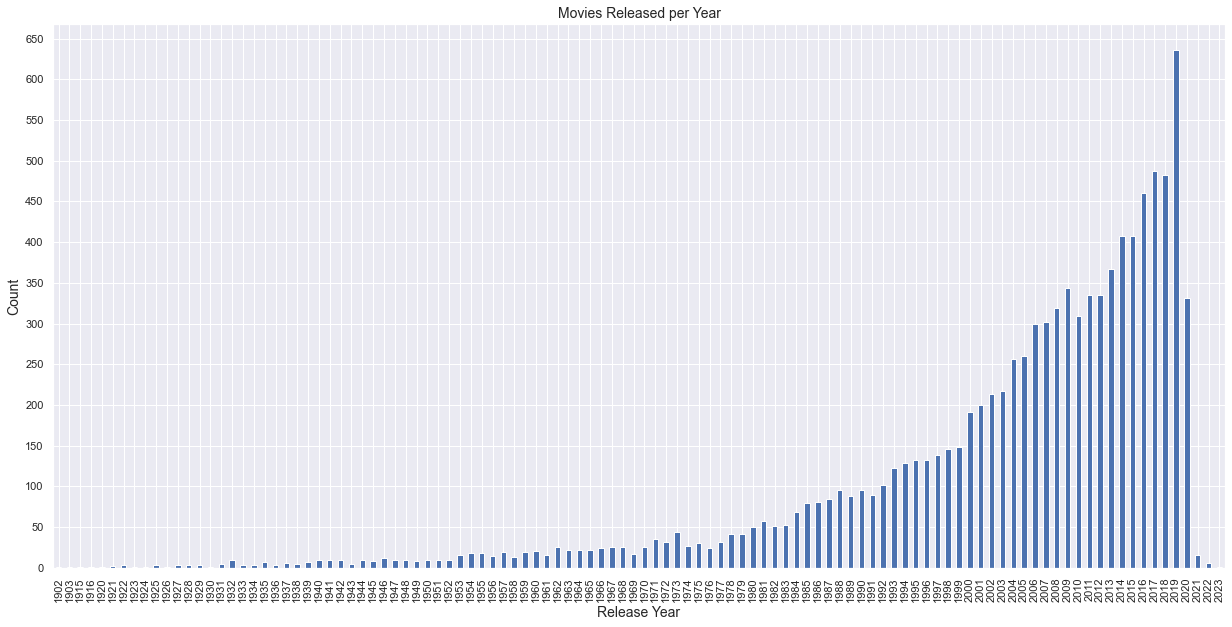

In [13]:
sns.set()
filme_ano = df.groupby('Release_Date').count()['Title']
plt.yticks((np.arange(0, 700, 50.0)))
plt.ylabel('Count', fontsize=14)
ax = filme_ano.plot(kind = 'bar', figsize = (21, 10), grid = True)
ax.set_xlabel("Release Year", fontsize=14)
ax.set_title('Movies Released per Year', fontsize = 14)
#plt.savefig('static/plots/movies_year.png', bbox_inches='tight')

In [14]:
df.loc[df['Release_Date']==1902]

,TMDb_Id,IMDb_Id,Title,Original_Title,Overview,Genres,Cast,Crew,Collection,Release_Date,...,Languages_Spoken,Runtime,Tagline,Popularity,Rating_average,Rating_Count,Production_Companies,Country_of_Origin,Budget,Revenue
3470,775,tt0000417,A Trip to the Moon,Le Voyage dans la Lune,Professor Barbenfouillis and five of his colle...,Adventure | Fantasy | Science Fiction,Georges Méliès | Henri Delannoy | Bleuette Ber...,Jules Verne | Georges Méliès | Georges Méliès ...,Single,1902,...,No Language,14.0,NaN,10.263,8.0,864,Star-Film,France,5985.0,0.0


In [15]:
df.loc[df['Release_Date']>2020]

,TMDb_Id,IMDb_Id,Title,Original_Title,Overview,Genres,Cast,Crew,Collection,Release_Date,...,Languages_Spoken,Runtime,Tagline,Popularity,Rating_average,Rating_Count,Production_Companies,Country_of_Origin,Budget,Revenue
872,634649,tt10872600,Untitled Spider-Man 3,Untitled Spider-Man 3,Sony Pictures Entertainment and The Walt Disne...,Action | Adventure | Science Fiction,Tom Holland | Zendaya | J.K. Simmons | Marisa ...,Seamus McGarvey | Stan Lee | Stan Lee | Kevin ...,Spider-Man (Avengers) Collection,2021,...,English,0.0,NaN,19.932,0.0,0,Sony Pictures | Marvel Studios | Pascal Pictur...,United States of America,0.0,0.0
2383,668203,NaN,Scary Movie 6,Scary Movie 6,[RUMORED] The sixth and final installment of ...,Comedy | Horror | Thriller,Anna Faris | Regina Hall | Shawn Wayans | Marl...,Marlon Wayans | Marlon Wayans | John Herzfeld ...,Scary Movie Collection,2021,...,NaN,0.0,The last movie never happened.,11.327,0.0,0,Lantern Entertainment,NaN,0.0,0.0
2865,338953,tt4123432,Fantastic Beasts 3,Fantastic Beasts 3,The adventures of writer Newt Scamander in New...,Adventure | Fantasy | Family,Eddie Redmayne | Johnny Depp | Jessica William...,Stuart Craig | J.K. Rowling | J.K. Rowling | S...,Fantastic Beasts Collection,2021,...,English,0.0,NaN,11.931,0.0,0,Warner Bros. Pictures | Heyday Films,United States of America,0.0,0.0
3894,603692,tt10366206,John Wick: Chapter 4,John Wick: Chapter 4,Continues where John Wick: Chapter 3 – Parabel...,Action | Crime | Thriller,Keanu Reeves | Laurence Fishburne,Chad Stahelski | Chad Stahelski | David Leitch...,John Wick Collection,2021,...,English,NaN,NaN,11.977,0.0,0,Lionsgate | Summit Entertainment | Thunder Roa...,United States of America,0.0,0.0
4314,616037,tt10648342,Thor: Love and Thunder,Thor: Love and Thunder,The fourth installment of the Marvel Studios' ...,Action | Adventure | Fantasy,Chris Hemsworth | Natalie Portman | Tessa Thom...,Stan Lee | Kevin Feige | Mayes C. Rubeo | Jack...,Thor Collection,2022,...,English,0.0,NaN,11.646,0.0,0,Marvel Studios,United States of America,0.0,0.0
4733,298618,tt0439572,The Flash,The Flash,The standalone film with The Flash set in the ...,Action | Adventure | Fantasy | Science Fiction,Ezra Miller | Kiersey Clemons | Billy Crudup |...,Kim Coleman | Zack Snyder | Kristy Carlson | M...,Single,2022,...,English,0.0,NaN,9.577,0.0,0,DC Comics | DC Entertainment | Warner Bros. Pi...,United States of America,0.0,0.0
4874,76600,tt1630029,Avatar 2,Avatar 2,A sequel to Avatar (2009).,Action | Adventure | Science Fiction,Kate Winslet | Zoe Saldana | Sam Worthington |...,Stephen E. Rivkin | Josh Friedman | Christophe...,Avatar Collection,2021,...,English,0.0,NaN,9.764,0.0,0,River Road Entertainment | TSG Entertainment |...,United States of America,387000000.0,0.0
5111,297708,tt2094116,Sherlock Holmes 3,Sherlock Holmes 3,The plot is unknown at this time.,Action | Crime | Mystery,Robert Downey Jr. | Jude Law | Rachel McAdams,Dexter Fletcher | Arthur Conan Doyle | Susan D...,Sherlock Holmes Collection,2021,...,English,0.0,NaN,9.529,0.0,0,NaN,United States of America,0.0,0.0
5492,414906,tt1877830,The Batman,The Batman,A point-of-view driven noir tale with heavy fo...,Action | Crime | Drama | Mystery,Robert Pattinson | Zoë Kravitz | Paul Dano | J...,William Hoy | Bob Kane | Michael Uslan | James...,Single,2021,...,English,0.0,NaN,10.235,0.0,0,DC Entertainment | Warner Bros. Pictures | DC ...,United States of America,0.0,0.0
5500,447365,tt6791350,Guardians of the Galaxy Vol. 3,Guardians of the Galaxy Vol. 3,The third film based on Marvel's Guardians of ...,Action | Adventure | Comedy | Science Fiction,Chris Pratt | Zoe Saldana | Dave Bautista | Br...,Kevin Feige | James Gunn | James Gunn | Louis ...,Guardians of the Galaxy Collection,2023,...,English,0.0,NaN,12.710,0.0,0,Marvel Studios,United States of America,0.0,0.0


In [16]:
df['Profit'] = df['Revenue'] - df['Budget']
df.head()

,TMDb_Id,IMDb_Id,Title,Original_Title,Overview,Genres,Cast,Crew,Collection,Release_Date,...,Runtime,Tagline,Popularity,Rating_average,Rating_Count,Production_Companies,Country_of_Origin,Budget,Revenue,Profit
0,419704,tt2935510,Ad Astra,Ad Astra,"The near future, a time when both hope and har...",Drama | Science Fiction,Brad Pitt | Tommy Lee Jones | Ruth Negga | Joh...,Brad Pitt | Arnon Milchan | Gary Rydstrom | Ga...,Single,2019,...,123.0,The answers we seek are just outside our reach,463.487,5.9,2863,New Regency Productions | Keep Your Head | Mad...,Brazil | China | United States of America,87500000.0,127175922.0,39675922.0
1,338762,tt1634106,Bloodshot,Bloodshot,"After he and his wife are murdered, marine Ray...",Action | Science Fiction,Vin Diesel | Eiza González | Sam Heughan | Tob...,John Papsidera | Matthew Vaughn | Jim May | Ne...,Single,2020,...,110.0,Being a superhero is in his blood,235.701,7.2,1384,Sony Pictures | Cross Creek Pictures | Mimran ...,China | United States of America,42000000.0,24573617.0,-17426383.0
2,38700,tt1502397,Bad Boys for Life,Bad Boys for Life,Marcus and Mike are forced to confront new thr...,Action | Crime | Thriller,Will Smith | Martin Lawrence | Paola Nuñez | V...,Jerry Bruckheimer | Mike Stenson | Chad Oman |...,Bad Boys Collection,2020,...,124.0,Ride together. Die together.,255.068,7.1,2596,Columbia Pictures | Platinum Dunes | 2.0 Enter...,France | United States of America,0.0,191150000.0,191150000.0
3,102899,tt0478970,Ant-Man,Ant-Man,Armed with the astonishing ability to shrink i...,Action | Adventure | Science Fiction,Paul Rudd | Michael Douglas | Evangeline Lilly...,David Lazan | Jackie Burch | Sala Baker | Sala...,Ant-Man Collection,2015,...,117.0,Heroes don't get any bigger.,134.294,7.1,13625,Marvel Studios,United States of America,130000000.0,519311965.0,389311965.0
4,76285,tt1854564,Percy Jackson: Sea of Monsters,Percy Jackson: Sea of Monsters,"In their quest to confront the ultimate evil, ...",Adventure | Fantasy | Family,Logan Lerman | Alexandra Daddario | Douglas Sm...,Mark Goldblatt | Shelly Johnson | Karen Rosenf...,Percy Jackson Collection,2013,...,106.0,"Where There Are Gods, There Are Monsters.",124.417,5.9,3547,Fox 2000 Pictures | Sunswept Entertainment | 1...,United States of America,90000000.0,199850315.0,109850315.0


In [17]:
df.loc[df['Budget']==0]

,TMDb_Id,IMDb_Id,Title,Original_Title,Overview,Genres,Cast,Crew,Collection,Release_Date,...,Runtime,Tagline,Popularity,Rating_average,Rating_Count,Production_Companies,Country_of_Origin,Budget,Revenue,Profit
2,38700,tt1502397,Bad Boys for Life,Bad Boys for Life,Marcus and Mike are forced to confront new thr...,Action | Crime | Thriller,Will Smith | Martin Lawrence | Paola Nuñez | V...,Jerry Bruckheimer | Mike Stenson | Chad Oman |...,Bad Boys Collection,2020,...,124.0,Ride together. Die together.,255.068,7.1,2596,Columbia Pictures | Platinum Dunes | 2.0 Enter...,France | United States of America,0.0,191150000.0,191150000.0
9,619264,tt8228288,The Platform,El hoyo,"A mysterious place, an indescribable prison, a...",Drama | Science Fiction,Ivan Massagué | Antonia San Juan | Zorion Egui...,Elena Ruiz | Aránzazu Calleja | Pedro Rivero |...,Single,2019,...,95.0,NaN,133.238,7.1,1976,Basque Films | Mr. Miyagi | Consejería de Cult...,Spain,0.0,0.0,0.0
13,508439,tt7146812,Onward,Onward,"In a suburban fantasy world, two teenage elf b...",Adventure | Animation | Comedy | Fantasy | Family,Tom Holland | Chris Pratt | Julia Louis-Dreyfu...,Mychael Danna | Kori Rae | Shannon Mills | Jua...,Single,2020,...,103.0,Their quest begineth.,138.425,8.0,991,Walt Disney Pictures | Pixar,United States of America,0.0,67119861.0,67119861.0
15,556678,tt9214832,Emma.,Emma.,"In 1800s England, a well-meaning but selfish y...",Comedy | Drama | Romance,Anya Taylor-Joy | Johnny Flynn | Josh O'Connor...,Tim Bevan | Eric Fellner | Kave Quinn | Ben Ba...,Single,2020,...,124.0,"Handsome, clever, and rich.",103.088,7.1,153,Working Title Films | Focus Features | Perfect...,United Kingdom,0.0,25155355.0,25155355.0
16,13761,tt0143808,Pocahontas II: Journey to a New World,Pocahontas II: Journey to a New World,When news of John Smith's death reaches Americ...,Adventure | Animation | Romance | Family,Irene Bedard | Jim Cummings | Donal Gibson | F...,Flip Kobler | Cindy Marcus | Bradley Raymond |...,Pocahontas Collection,1998,...,72.0,NaN,146.217,5.3,847,Disney Television Animation,United States of America,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,550678,tt1369571,I Am Fear,I Am Fear,"Held captive by terrorists, celebrity reporter...",Horror | Thriller,Eoin Macken | Kristina Klebe | William Forsyth...,Kevin Shulman | Kevin Shulman | Nathaniel Shulman,Single,2020,...,87.0,NaN,6.501,7.7,3,Roxwell Films | AXIOM 8 | Shout! Factory,United States of America,0.0,0.0,0.0
9993,40641,tt0055093,Lola,Lola,A bored young man meets with his former girlfr...,Drama | Romance,Anouk Aimée | Marc Michel | Jacques Harden | A...,Raoul Coutard | Suzanne Schiffman | Carlo Pont...,Single,1961,...,90.0,NaN,7.310,7.4,70,Rome Paris Films,France,0.0,0.0,0.0
9994,14538,tt0882978,Three Kingdoms: Resurrection of the Dragon,三国之见龙卸甲,The aging Zhao embarks on his final and greate...,Action | Drama | History,Sammo Hung | Vanness Wu | Maggie Q | Andy Lau ...,Daniel Lee | Chung Tae-won,Single,2008,...,102.0,NaN,8.912,6.3,65,Visualizer Film Productions | Taewon Entertain...,China | Hong Kong | South Korea,0.0,0.0,0.0
9995,603937,NaN,Bliss Point,Bliss Point,Two boys row silently through a Dutch water la...,Drama,Aris Maverick | Jesse Charif,Robin Vogel | Robin Vogel | Robin Vogel | Luis...,Single,2017,...,9.0,NaN,8.228,0.0,0,NaN,NaN,0.0,0.0,0.0


In [18]:
df1 = df[df.Budget != 0]
df1.head()

,TMDb_Id,IMDb_Id,Title,Original_Title,Overview,Genres,Cast,Crew,Collection,Release_Date,...,Runtime,Tagline,Popularity,Rating_average,Rating_Count,Production_Companies,Country_of_Origin,Budget,Revenue,Profit
0,419704,tt2935510,Ad Astra,Ad Astra,"The near future, a time when both hope and har...",Drama | Science Fiction,Brad Pitt | Tommy Lee Jones | Ruth Negga | Joh...,Brad Pitt | Arnon Milchan | Gary Rydstrom | Ga...,Single,2019,...,123.0,The answers we seek are just outside our reach,463.487,5.9,2863,New Regency Productions | Keep Your Head | Mad...,Brazil | China | United States of America,87500000.0,127175922.0,39675922.0
1,338762,tt1634106,Bloodshot,Bloodshot,"After he and his wife are murdered, marine Ray...",Action | Science Fiction,Vin Diesel | Eiza González | Sam Heughan | Tob...,John Papsidera | Matthew Vaughn | Jim May | Ne...,Single,2020,...,110.0,Being a superhero is in his blood,235.701,7.2,1384,Sony Pictures | Cross Creek Pictures | Mimran ...,China | United States of America,42000000.0,24573617.0,-17426383.0
3,102899,tt0478970,Ant-Man,Ant-Man,Armed with the astonishing ability to shrink i...,Action | Adventure | Science Fiction,Paul Rudd | Michael Douglas | Evangeline Lilly...,David Lazan | Jackie Burch | Sala Baker | Sala...,Ant-Man Collection,2015,...,117.0,Heroes don't get any bigger.,134.294,7.1,13625,Marvel Studios,United States of America,130000000.0,519311965.0,389311965.0
4,76285,tt1854564,Percy Jackson: Sea of Monsters,Percy Jackson: Sea of Monsters,"In their quest to confront the ultimate evil, ...",Adventure | Fantasy | Family,Logan Lerman | Alexandra Daddario | Douglas Sm...,Mark Goldblatt | Shelly Johnson | Karen Rosenf...,Percy Jackson Collection,2013,...,106.0,"Where There Are Gods, There Are Monsters.",124.417,5.9,3547,Fox 2000 Pictures | Sunswept Entertainment | 1...,United States of America,90000000.0,199850315.0,109850315.0
5,495764,tt7713068,Birds of Prey (and the Fantabulous Emancipatio...,Birds of Prey (and the Fantabulous Emancipatio...,"Harley Quinn joins forces with a singer, an as...",Action | Comedy | Crime,Margot Robbie | Ewan McGregor | Mary Elizabeth...,K.K. Barrett | K.K. Barrett | Matthew Libatiqu...,Single,2020,...,109.0,Mind Over Mayhem,192.582,7.1,2681,DC Entertainment | LuckyChap Entertainment | K...,United States of America,75000000.0,199158461.0,124158461.0


In [19]:
df1.shape

(5793, 23)

In [20]:
top_profit = df1.sort_values(by='Profit', ascending=False)
top_revenue = df1.sort_values(by='Revenue', ascending=False)
top_popularity = df1.sort_values(by='Popularity', ascending=False)
top_rated = df1.sort_values(by='Rating_average', ascending=False)

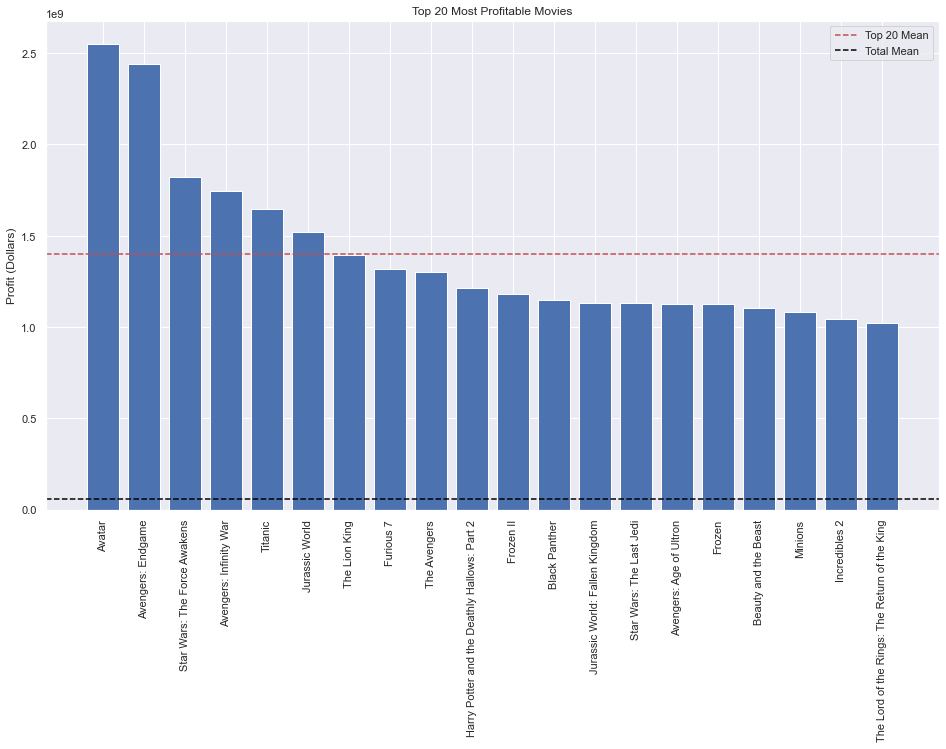

In [21]:
media = top_profit['Profit'][:20].mean()
media_total = top_profit['Profit'].mean()
x = top_profit['Title'][:20]
y = top_profit['Profit'][:20]
plt.figure(figsize=(16, 9))
plt.axhline(media, color='r', linestyle='--')
plt.axhline(media_total, color='black', linestyle='--')
plt.legend(['Top 20 Mean', 'Total Mean'])
plt.xticks(rotation='vertical')
plt.title('Top 20 Most Profitable Movies')
plt.ylabel('Profit (Dollars)')
plt.bar(x,y)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#plt.savefig('static/plots/profit.png', bbox_inches='tight')

<BarContainer object of 20 artists>

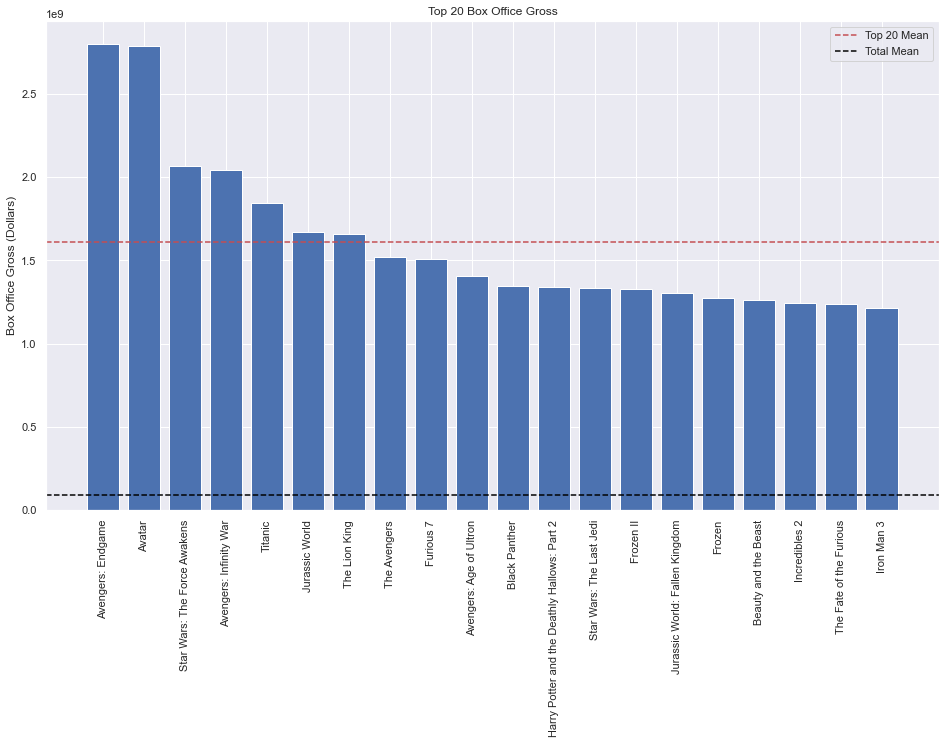

In [22]:
media = top_revenue['Revenue'][:20].mean()
media_total = top_revenue['Revenue'].mean()
x = top_revenue['Title'][:20]
y = top_revenue['Revenue'][:20]
plt.figure(figsize=(16, 9))
plt.axhline(media, color='r', linestyle='--')
plt.axhline(media_total, color='black', linestyle='--')
plt.legend(['Top 20 Mean', 'Total Mean'])
plt.xticks(rotation='vertical')
plt.title('Top 20 Box Office Gross')
plt.ylabel('Box Office Gross (Dollars)')
plt.bar(x,y)
#plt.savefig('static/plots/revenue.png', bbox_inches='tight')

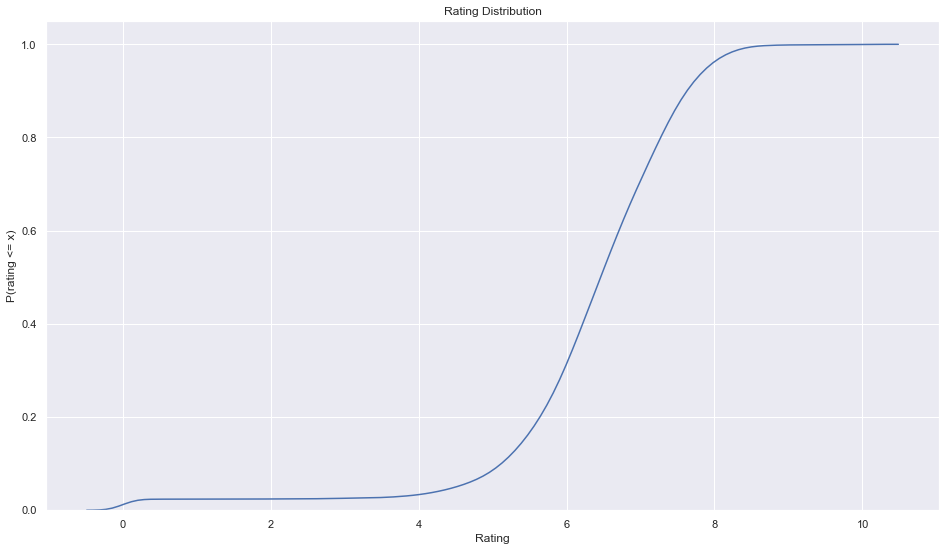

In [23]:
notas = np.sort(df['Rating_average'])
plt.figure(figsize=(16, 9))
sns.distplot(notas, hist=False, kde_kws={'cumulative': True})
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('P(rating <= x)')
#plt.savefig('static/plots/rating_distribution.png', bbox_inches='tight')
plt.show()

<BarContainer object of 20 artists>

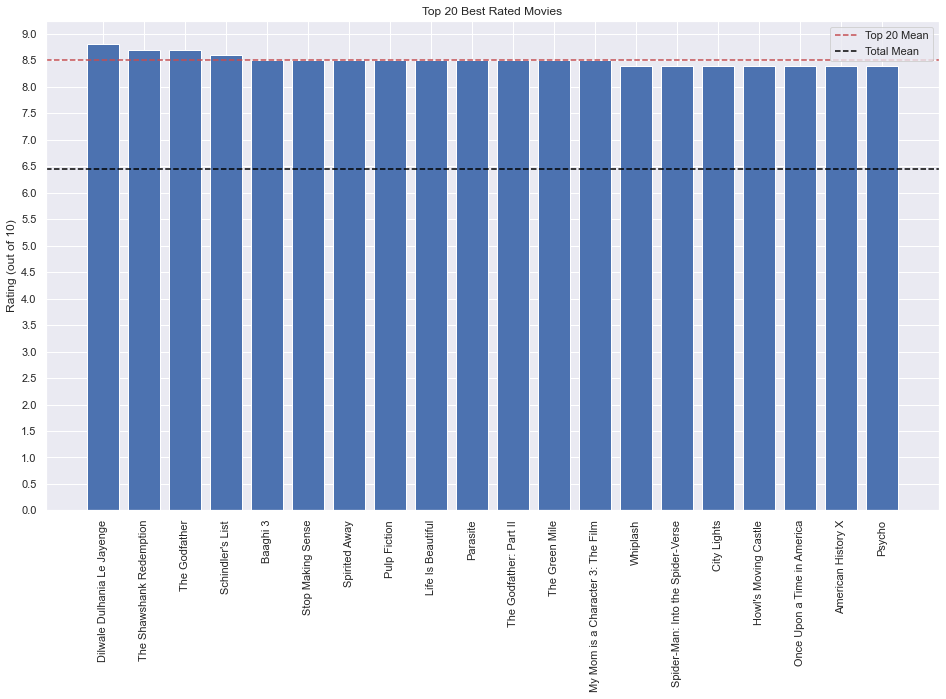

In [24]:
media = top_rated['Rating_average'][:20].mean()
media_total = top_rated['Rating_average'].mean()
x = top_rated['Title'][:20]
y = top_rated['Rating_average'][:20]
plt.figure(figsize=(16, 9))
plt.axhline(media, color='r', linestyle='--')
plt.axhline(media_total, color='black', linestyle='--')
plt.legend(['Top 20 Mean', 'Total Mean'])
plt.xticks(rotation='vertical')
plt.title('Top 20 Best Rated Movies')
plt.ylabel('Rating (out of 10)')
plt.yticks((np.arange(0, 10+1, 0.5)))
plt.bar(x,y)
#plt.savefig('static/plots/rating.png', bbox_inches='tight')

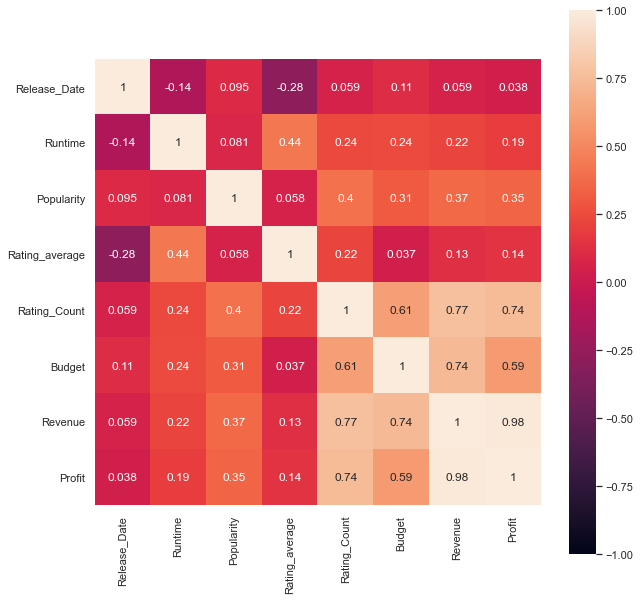

In [25]:
df2 = df.drop(['TMDb_Id'], axis=1)
corr_mat = df2.corr()

f, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(
    corr_mat, 
    annot=True, 
    square=True, 
    vmax=1, 
    vmin=-1
)
#plt.savefig('static/plots/correlation.png', bbox_inches='tight')

<BarContainer object of 20 artists>

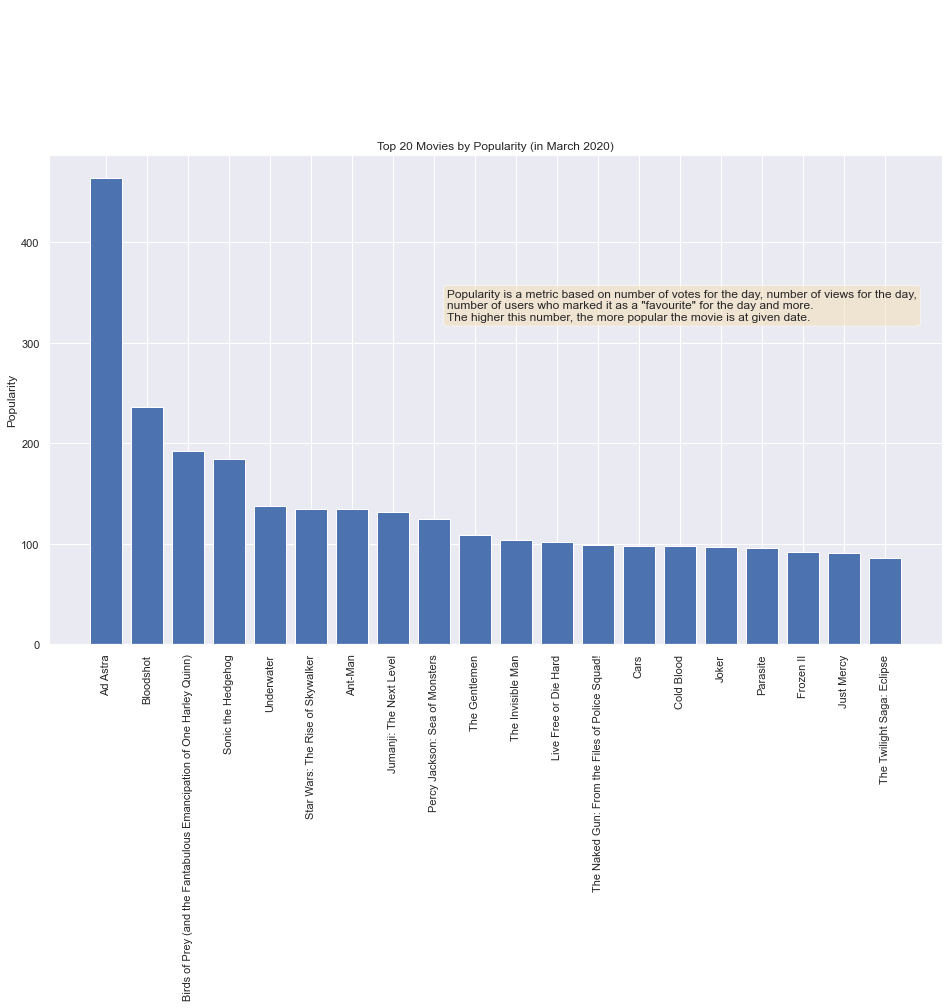

In [26]:
x = top_popularity['Title'][:20]
y = top_popularity['Popularity'][:20]
plt.figure(figsize=(16, 9))
plt.xticks(rotation='vertical')
plt.title('Top 20 Movies by Popularity (in March 2020)')
textstr = 'Popularity is a metric based on number of votes for the day, number of views for the day,\nnumber of users who marked it as a "favourite" for the day and more.\nThe higher this number, the more popular the movie is at given date.'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.8, 1.3, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)
plt.ylabel('Popularity')
plt.bar(x,y)
#plt.savefig('static/plots/popularity.png', bbox_inches='tight')

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
df = df.astype({'Title': str})
df = df.astype({'Overview': str})
df = df.astype({'Genres': str})

In [29]:
stopwords = nltk.corpus.stopwords.words('english')
def processa(row):
    txt = row['Title'] + ' ' + row['Overview'] + ' ' + row['Genres']
    
    return ' '.join([t for t in word_tokenize(txt.lower()) if (t not in stopwords) and (t not in punctuation)])

df['doc'] = df.apply(processa, axis=1)

df['doc'].head()

0    ad astra near future time hope hardships drive...
1    bloodshot wife murdered marine ray garrison re...
2    bad boys life marcus mike forced confront new ...
3    ant-man armed astonishing ability shrink scale...
4    percy jackson sea monsters quest confront ulti...
Name: doc, dtype: object

In [30]:
vectorizer = TfidfVectorizer(
    analyzer='word',
    ngram_range=(1, 1),
    max_features=None,
    binary=False,
    use_idf=True
)
tfidf_matrix = vectorizer.fit_transform(df['doc'])

tfidf_matrix

<9997x30487 sparse matrix of type '<class 'numpy.float64'>'
	with 302132 stored elements in Compressed Sparse Row format>

In [31]:
print(vectorizer.get_feature_names()[:500])

['00', '000', '006', '007', '01', '03', '05pm', '10', '100', '1000', '100th', '101', '102', '1021', '108', '10pm', '10th', '10x10', '11', '1111', '1127', '1138', '114', '117', '118', '1183', '118th', '119', '11th', '12', '120', '1200', '1215', '125', '1250', '125th', '127', '128', '12th', '13', '1300', '133', '1344', '1345', '1347', '13th', '14', '140', '1408', '141', '142', '1429', '1453', '147', '148', '1492', '14pm', '14th', '15', '150', '150th', '1536', '155', '1560', '1561', '1562', '1572', '1592', '1596', '1597', '1598', '15th', '16', '1600', '161', '1613', '1614', '1630s', '1644', '1645', '165', '1650', '1681', '1692', '16th', '17', '170', '1700s', '174', '1740', '1760', '1787', '1798', '17th', '18', '180', '1800', '1800s', '1804', '1812', '1818', '1819', '1820', '1820s', '1825', '1829', '1830', '1830s', '1831', '1836', '1840s', '1843', '1845', '1847', '1850', '1850s', '1851', '1857', '1860', '1860s', '1862', '1863', '1865', '1870', '1870s', '1873', '1875', '1879', '1880', '1880

In [32]:
import urllib.parse
import requests

In [42]:
filme = input('Escreva um filme: ')
filme_encoded = urllib.parse.quote(filme)

Escreva um filme: doutor estranho


In [43]:
req = requests.get('https://api.themoviedb.org/3/search/movie?api_key=ef3f596bf0d222c443d5f40e548d80e0&language=en-US&query='+filme_encoded+'&page=1&include_adult=false').json()
req

{'page': 1,
 'total_results': 5,
 'total_pages': 1,
 'results': [{'popularity': 3.965,
   'vote_count': 33,
   'video': False,
   'poster_path': '/5B4z5Ch5Dek8hQJ7UlIVZgWLntV.jpg',
   'id': 50468,
   'adult': False,
   'backdrop_path': '/movXPej8ObOzKNvcDW3fcfiNxaT.jpg',
   'original_language': 'en',
   'original_title': 'Dr. Strange',
   'genre_ids': [28, 12, 14, 878, 10770],
   'title': 'Dr. Strange',
   'vote_average': 5.8,
   'overview': 'A psychiatrist becomes the new Sorcerer Supreme of the Earth in order to battle an evil Sorceress from the past.',
   'release_date': '1978-09-06'},
  {'popularity': 41.929,
   'vote_count': 15368,
   'video': False,
   'poster_path': '/gwi5kL7HEWAOTffiA14e4SbOGra.jpg',
   'id': 284052,
   'adult': False,
   'backdrop_path': '/aL53oMdZKZRJRH8txH07DLuleF9.jpg',
   'original_language': 'en',
   'original_title': 'Doctor Strange',
   'genre_ids': [28, 12, 14, 878],
   'title': 'Doctor Strange',
   'vote_average': 7.4,
   'overview': 'After his career

In [44]:
plot = req['results'][0]['overview']
nome = req['results'][0]['title']
req1 = requests.get('https://api.themoviedb.org/3/genre/movie/list?api_key=ef3f596bf0d222c443d5f40e548d80e0&language=en-US').json()
genero = ''
poster = req['results'][0]['poster_path']
for i in req1['genres']:
    if i['id'] in req['results'][0]['genre_ids']:
        genero = (genero + ' ' + i['name']).lower()
genero = genero.lstrip()
print(genero)
#runtime = int(df.loc[df['Title']==nome]['Runtime'])

action adventure fantasy science fiction tv movie


In [45]:
from IPython.core.display import display, HTML
poster_filme = display(HTML('<img src=https://image.tmdb.org/t/p/original/' + poster + ' style="width: 20%">'))
#poster_filme

In [46]:
texto = nome + ' ' + plot + ' ' + genero
print(texto)

Dr. Strange A psychiatrist becomes the new Sorcerer Supreme of the Earth in order to battle an evil Sorceress from the past. action adventure fantasy science fiction tv movie


In [47]:
processado = ' '.join([t for t in word_tokenize(texto.lower()) if (t not in stopwords) and (t not in punctuation)])
print(processado)

dr. strange psychiatrist becomes new sorcerer supreme earth order battle evil sorceress past action adventure fantasy science fiction tv movie


In [48]:
vet = vectorizer.transform([processado])
sim = cosine_similarity(tfidf_matrix, vet)

In [41]:
df['similaridade'] = sim
similar = df.sort_values(by = 'similaridade', ascending = False)
print('5 filmes semelhantes:\n')
for titulo in similar['Title'][1:6]:
    print (titulo)
    filme_encoded1 = urllib.parse.quote(titulo)
    req2 = requests.get('https://api.themoviedb.org/3/search/movie?api_key=ef3f596bf0d222c443d5f40e548d80e0&language=en-US&query='+filme_encoded1+'&page=1&include_adult=false').json()
    poster1 = req2['results'][0]['poster_path']
    display(HTML('<img src=https://image.tmdb.org/t/p/original/' + poster1 + ' style="width: 20%">'))

5 filmes semelhantes:

Doctor Strange in the Multiverse of Madness


The Sorcerer's Apprentice


Doctor Strange


Dragonheart 3: The Sorcerer's Curse


Your Highness


In [46]:
df_drama = df.loc[df['Genres'].str.contains('Drama')].copy()

In [47]:
df_drama['target']=1
df_drama.head()

,TMDb_Id,IMDb_Id,Title,Original_Title,Overview,Genres,Cast,Crew,Collection,Release_Date,...,Rating_average,Rating_Count,Production_Companies,Country_of_Origin,Budget,Revenue,Profit,doc,similaridade,target
0,419704,tt2935510,Ad Astra,Ad Astra,"The near future, a time when both hope and har...",Drama | Science Fiction,Brad Pitt | Tommy Lee Jones | Ruth Negga | Joh...,Brad Pitt | Arnon Milchan | Gary Rydstrom | Ga...,Single,2019,...,5.9,2863,New Regency Productions | Keep Your Head | Mad...,Brazil | China | United States of America,87500000.0,127175922.0,39675922.0,ad astra near future time hope hardships drive...,0.000000,1
9,619264,tt8228288,The Platform,El hoyo,"A mysterious place, an indescribable prison, a...",Drama | Science Fiction,Ivan Massagué | Antonia San Juan | Zorion Egui...,Elena Ruiz | Aránzazu Calleja | Pedro Rivero |...,Single,2019,...,7.1,1976,Basque Films | Mr. Miyagi | Consejería de Cult...,Spain,0.0,0.0,0.0,platform mysterious place indescribable prison...,0.000000,1
11,24021,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,Bella once again finds herself surrounded by d...,Adventure | Drama | Fantasy | Romance,Kristen Stewart | Robert Pattinson | Taylor La...,Howard Shore | Javier Aguirresarobe | Mark Gol...,The Twilight Collection,2010,...,6.1,5693,Sunswept Entertainment | Summit Entertainment ...,United States of America,68000000.0,698491347.0,630491347.0,twilight saga eclipse bella finds surrounded d...,0.000000,1
15,556678,tt9214832,Emma.,Emma.,"In 1800s England, a well-meaning but selfish y...",Comedy | Drama | Romance,Anya Taylor-Joy | Johnny Flynn | Josh O'Connor...,Tim Bevan | Eric Fellner | Kave Quinn | Ben Ba...,Single,2020,...,7.1,153,Working Title Films | Focus Features | Perfect...,United Kingdom,0.0,25155355.0,25155355.0,emma 1800s england well-meaning selfish young ...,0.008866,1
19,309886,tt3647498,Blood Father,Blood Father,An ex-con reunites with his estranged wayward ...,Action | Drama | Thriller,Mel Gibson | Erin Moriarty | William H. Macy |...,Steven Rosenblum | Chris Briggs | Pascal Cauch...,Single,2016,...,6.1,947,Wild Bunch | Why Not Productions,France,13000000.0,0.0,-13000000.0,blood father ex-con reunites estranged wayward...,0.012984,1


In [48]:
df_notdrama = df.loc[~df['Genres'].str.contains('Drama')].copy()
df_notdrama.head()

,TMDb_Id,IMDb_Id,Title,Original_Title,Overview,Genres,Cast,Crew,Collection,Release_Date,...,Popularity,Rating_average,Rating_Count,Production_Companies,Country_of_Origin,Budget,Revenue,Profit,doc,similaridade
1,338762,tt1634106,Bloodshot,Bloodshot,"After he and his wife are murdered, marine Ray...",Action | Science Fiction,Vin Diesel | Eiza González | Sam Heughan | Tob...,John Papsidera | Matthew Vaughn | Jim May | Ne...,Single,2020,...,235.701,7.2,1384,Sony Pictures | Cross Creek Pictures | Mimran ...,China | United States of America,42000000.0,24573617.0,-17426383.0,bloodshot wife murdered marine ray garrison re...,0.000000
2,38700,tt1502397,Bad Boys for Life,Bad Boys for Life,Marcus and Mike are forced to confront new thr...,Action | Crime | Thriller,Will Smith | Martin Lawrence | Paola Nuñez | V...,Jerry Bruckheimer | Mike Stenson | Chad Oman |...,Bad Boys Collection,2020,...,255.068,7.1,2596,Columbia Pictures | Platinum Dunes | 2.0 Enter...,France | United States of America,0.0,191150000.0,191150000.0,bad boys life marcus mike forced confront new ...,0.000000
3,102899,tt0478970,Ant-Man,Ant-Man,Armed with the astonishing ability to shrink i...,Action | Adventure | Science Fiction,Paul Rudd | Michael Douglas | Evangeline Lilly...,David Lazan | Jackie Burch | Sala Baker | Sala...,Ant-Man Collection,2015,...,134.294,7.1,13625,Marvel Studios,United States of America,130000000.0,519311965.0,389311965.0,ant-man armed astonishing ability shrink scale...,0.000000
4,76285,tt1854564,Percy Jackson: Sea of Monsters,Percy Jackson: Sea of Monsters,"In their quest to confront the ultimate evil, ...",Adventure | Fantasy | Family,Logan Lerman | Alexandra Daddario | Douglas Sm...,Mark Goldblatt | Shelly Johnson | Karen Rosenf...,Percy Jackson Collection,2013,...,124.417,5.9,3547,Fox 2000 Pictures | Sunswept Entertainment | 1...,United States of America,90000000.0,199850315.0,109850315.0,percy jackson sea monsters quest confront ulti...,0.004032
5,495764,tt7713068,Birds of Prey (and the Fantabulous Emancipatio...,Birds of Prey (and the Fantabulous Emancipatio...,"Harley Quinn joins forces with a singer, an as...",Action | Comedy | Crime,Margot Robbie | Ewan McGregor | Mary Elizabeth...,K.K. Barrett | K.K. Barrett | Matthew Libatiqu...,Single,2020,...,192.582,7.1,2681,DC Entertainment | LuckyChap Entertainment | K...,United States of America,75000000.0,199158461.0,124158461.0,birds prey fantabulous emancipation one harley...,0.005189


In [49]:
df_notdrama['target']=0
df_notdrama.head()

,TMDb_Id,IMDb_Id,Title,Original_Title,Overview,Genres,Cast,Crew,Collection,Release_Date,...,Rating_average,Rating_Count,Production_Companies,Country_of_Origin,Budget,Revenue,Profit,doc,similaridade,target
1,338762,tt1634106,Bloodshot,Bloodshot,"After he and his wife are murdered, marine Ray...",Action | Science Fiction,Vin Diesel | Eiza González | Sam Heughan | Tob...,John Papsidera | Matthew Vaughn | Jim May | Ne...,Single,2020,...,7.2,1384,Sony Pictures | Cross Creek Pictures | Mimran ...,China | United States of America,42000000.0,24573617.0,-17426383.0,bloodshot wife murdered marine ray garrison re...,0.000000,0
2,38700,tt1502397,Bad Boys for Life,Bad Boys for Life,Marcus and Mike are forced to confront new thr...,Action | Crime | Thriller,Will Smith | Martin Lawrence | Paola Nuñez | V...,Jerry Bruckheimer | Mike Stenson | Chad Oman |...,Bad Boys Collection,2020,...,7.1,2596,Columbia Pictures | Platinum Dunes | 2.0 Enter...,France | United States of America,0.0,191150000.0,191150000.0,bad boys life marcus mike forced confront new ...,0.000000,0
3,102899,tt0478970,Ant-Man,Ant-Man,Armed with the astonishing ability to shrink i...,Action | Adventure | Science Fiction,Paul Rudd | Michael Douglas | Evangeline Lilly...,David Lazan | Jackie Burch | Sala Baker | Sala...,Ant-Man Collection,2015,...,7.1,13625,Marvel Studios,United States of America,130000000.0,519311965.0,389311965.0,ant-man armed astonishing ability shrink scale...,0.000000,0
4,76285,tt1854564,Percy Jackson: Sea of Monsters,Percy Jackson: Sea of Monsters,"In their quest to confront the ultimate evil, ...",Adventure | Fantasy | Family,Logan Lerman | Alexandra Daddario | Douglas Sm...,Mark Goldblatt | Shelly Johnson | Karen Rosenf...,Percy Jackson Collection,2013,...,5.9,3547,Fox 2000 Pictures | Sunswept Entertainment | 1...,United States of America,90000000.0,199850315.0,109850315.0,percy jackson sea monsters quest confront ulti...,0.004032,0
5,495764,tt7713068,Birds of Prey (and the Fantabulous Emancipatio...,Birds of Prey (and the Fantabulous Emancipatio...,"Harley Quinn joins forces with a singer, an as...",Action | Comedy | Crime,Margot Robbie | Ewan McGregor | Mary Elizabeth...,K.K. Barrett | K.K. Barrett | Matthew Libatiqu...,Single,2020,...,7.1,2681,DC Entertainment | LuckyChap Entertainment | K...,United States of America,75000000.0,199158461.0,124158461.0,birds prey fantabulous emancipation one harley...,0.005189,0


In [50]:
df2 = df_drama
print(df.shape)
df2 = df2.append(df_notdrama, ignore_index=True)
print(df.shape)

(9997, 25)
(9997, 25)


In [51]:
df2 = df2.drop(['similaridade'], axis=1)
df2.head()

,TMDb_Id,IMDb_Id,Title,Original_Title,Overview,Genres,Cast,Crew,Collection,Release_Date,...,Popularity,Rating_average,Rating_Count,Production_Companies,Country_of_Origin,Budget,Revenue,Profit,doc,target
0,419704,tt2935510,Ad Astra,Ad Astra,"The near future, a time when both hope and har...",Drama | Science Fiction,Brad Pitt | Tommy Lee Jones | Ruth Negga | Joh...,Brad Pitt | Arnon Milchan | Gary Rydstrom | Ga...,Single,2019,...,463.487,5.9,2863,New Regency Productions | Keep Your Head | Mad...,Brazil | China | United States of America,87500000.0,127175922.0,39675922.0,ad astra near future time hope hardships drive...,1
1,619264,tt8228288,The Platform,El hoyo,"A mysterious place, an indescribable prison, a...",Drama | Science Fiction,Ivan Massagué | Antonia San Juan | Zorion Egui...,Elena Ruiz | Aránzazu Calleja | Pedro Rivero |...,Single,2019,...,133.238,7.1,1976,Basque Films | Mr. Miyagi | Consejería de Cult...,Spain,0.0,0.0,0.0,platform mysterious place indescribable prison...,1
2,24021,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,Bella once again finds herself surrounded by d...,Adventure | Drama | Fantasy | Romance,Kristen Stewart | Robert Pattinson | Taylor La...,Howard Shore | Javier Aguirresarobe | Mark Gol...,The Twilight Collection,2010,...,85.990,6.1,5693,Sunswept Entertainment | Summit Entertainment ...,United States of America,68000000.0,698491347.0,630491347.0,twilight saga eclipse bella finds surrounded d...,1
3,556678,tt9214832,Emma.,Emma.,"In 1800s England, a well-meaning but selfish y...",Comedy | Drama | Romance,Anya Taylor-Joy | Johnny Flynn | Josh O'Connor...,Tim Bevan | Eric Fellner | Kave Quinn | Ben Ba...,Single,2020,...,103.088,7.1,153,Working Title Films | Focus Features | Perfect...,United Kingdom,0.0,25155355.0,25155355.0,emma 1800s england well-meaning selfish young ...,1
4,309886,tt3647498,Blood Father,Blood Father,An ex-con reunites with his estranged wayward ...,Action | Drama | Thriller,Mel Gibson | Erin Moriarty | William H. Macy |...,Steven Rosenblum | Chris Briggs | Pascal Cauch...,Single,2016,...,67.727,6.1,947,Wild Bunch | Why Not Productions,France,13000000.0,0.0,-13000000.0,blood father ex-con reunites estranged wayward...,1


In [52]:
tfidf_matrix2 = vectorizer.fit_transform(df2['doc'])
tfidf_matrix2

<9997x30487 sparse matrix of type '<class 'numpy.float64'>'
	with 302132 stored elements in Compressed Sparse Row format>

In [53]:
x = tfidf_matrix2
y = df2['target']

In [54]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [55]:
x_train, x_test, y_train, y_test = train_test_split(
    x, 
    y, 
    test_size=0.2, 
    )

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(7997, 30487) (7997,)
(2000, 30487) (2000,)


In [56]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.preprocessing import *

std = StandardScaler(with_mean=False)
std.fit(x_train)

x_train = std.transform(x_train)
x_test = std.transform(x_test)


model = MLPClassifier(
    hidden_layer_sizes=(50, 15),
    activation='tanh',    
    max_iter=500,
    random_state=1
)

model.fit(
    x_train, y_train
)

y_pred = model.predict(x_test)
y_pred

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [57]:
metrics.f1_score(
    y_test, 
    y_pred, 
    average=None # Para múltiplas classes
)

array([0.73318681, 0.64811594])

In [58]:
# Teste com resumo de um filme dramático
model.predict(vectorizer.transform(['Forever alone in a crowd, failed comedian Arthur Fleck seeks connection as he walks the streets of Gotham City. Arthur wears two masks -- the one he paints for his day job as a clown, and the guise he projects in a futile attempt to feel like he is part of the world around him. Isolated, bullied and disregarded by society, Fleck begins a slow descent into madness as he transforms into the criminal mastermind known as the Joker.']))

array([0], dtype=int64)

In [59]:
model.predict_proba(vectorizer.transform(['Forever alone in a crowd, failed comedian Arthur Fleck seeks connection as he walks the streets of Gotham City. Arthur wears two masks -- the one he paints for his day job as a clown, and the guise he projects in a futile attempt to feel like he is part of the world around him. Isolated, bullied and disregarded by society, Fleck begins a slow descent into madness as he transforms into the criminal mastermind known as the Joker.']))

array([[0.50843941, 0.49156059]])

In [60]:
# Teste com resumo de um filme não-dramático
model.predict(vectorizer.transform(['Doug and his three best men go to Las Vegas to celebrate his bachelor party. However, the three best men wake up the next day with a hangover and realise that Doug is missing.']))

array([0], dtype=int64)

In [61]:
model.predict_proba(vectorizer.transform(['Doug and his three best men go to Las Vegas to celebrate his bachelor party. However, the three best men wake up the next day with a hangover and realise that Doug is missing.']))

array([[0.56101301, 0.43898699]])